# Tesisquare Dataset Analysis

## A data science project by Porsche GTRR

We are the Porsche GTRR a team formed by Grosso Luca, Torterolo Francesco, Risso Beatrice e Robresco Simone

# Tesisquare Dataset Analysis Project

### Roles:


- __Graphics Designer:__ Luca Grosso
- __Coders:__ Simone Robresco, Francesco Torterolo, Beatrice Risso
- __Code reviewer:__ Luca Grosso, Beatrice Risso
- __Notebook Redactor:__ Beatrice Risso, Luca Grosso

## Project Structure

1. __Introduction:__ Overview of the project goals and team roles.
2. __Dataset Description:__ Summary of the dataset provided by Tesisquare and its key features.
3. __Exploratory Data Analysis (EDA):__ High-level exploration of trends and patterns.
4. __Conclusions:__ Insights derived from the analysis.

## CSV Structure

- __SERVICETYPE:__  type of service or vehicle used for the delivery
- __VEHICLETYPE:__ type of vehicle
- __DEPARTURE_COUNTRY:__ country of departure
- __DEPARTURE_ZIPCODE:__ zipocde (CAP) of departure
- __ARRIVAL_COUNTRY:__ country of arrival
- __ARRIVAL_ZIPCODE:__ zipcode (CAP) of arrival

## Introduction

In this project, our team analyzed a dataset provided by the company Tesisquare related to logistics to analyze the data and the relationships between the different features of the dataset. Specifically, we examined the connections between: 


Simone Robresco, Francesco Torterolo, and Beatrice Risso developed the code for data analysis and visualization. Simone Robresco and Luca Grosso designed the types of charts used and the website. Beatrice Risso and Luca Grosso organized the notebook and customized the project presentation.

# Dataset Description

The dataset provides logistics data from a company that handles intercontinental shipments, including:

- Logistics details (e.g., mode of transport used, services utilized, shipping day and date). 
- Travel-related information (e.g., departure and arrival countries, departure and arrival zip codes, distance in km).
- Information related to the transported products (e.g., net and gross weight, volume). 

Understanding the data's structure and cleaning it is crucial before diving into the analysis.

# Exploratory Data Analysis (EDA)

## __Goals of the Analysis__

The main objective of this analysis is to understand the relationships between the characteristics of the shipments and the delivery times. Key areas of interest include:

- The difference in vehicles and services.
- The departure and arrival countries
- The shipping date.


### Importation of libraries and upload of the dataset

In this cell we are importing all the libraries that will be necessary for all the different snippets,
and than upload the dataset via an xls file that we gained before using the API on the original dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import requests
from math import radians, sin, cos, sqrt, atan2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
# Upload of the dataset
file_path = './delivery_data.xls'
data = pd.read_csv(file_path)

### Basic analysis of the features and values of the dataset

In the next three cells we analyzed the dataset to understand how to work on it, specially trying to understand
how many NULL data for each feature we had

In [3]:
# Shows the first rows of the dataset
print("First rows of the dataset:")
print(data.head())

First rows of the dataset:
   Unnamed: 0 SERVICETYPE VEHICLETYPE DEPARTURE_COUNTRY  DEPARTURE_ZIPCODE  \
0           1         NaN         NaN                IT            62010.0   
1           2         NaN         NaN                IT            62010.0   
2           3         NaN         NaN                IT            62010.0   
3           4         NaN         NaN                IT            62010.0   
4           5         NaN         NaN                IT            62010.0   

  ARRIVAL_COUNTRY  ARRIVAL_ZIPCODE        SHIPPING_DATE  GROSS_WEIGHT_KG  \
0              IT            20121  2023-01-11 00:00:14             7.30   
1              IT            15069  2023-01-11 00:00:14             1.70   
2              IT            10036  2023-01-11 00:00:14             0.72   
3              IT            70121  2023-01-11 00:00:14             0.86   
4              IT            20090  2023-01-11 00:00:14             0.58   

   NET_WEIGHT_KG  VOLUME_M3  DECLARED_DISTANCE_

In [4]:
# Descriptive statistics
print("\nDescriptive statistics:")
data.describe()



Descriptive statistics:


,Unnamed: 0,DEPARTURE_ZIPCODE,ARRIVAL_ZIPCODE,GROSS_WEIGHT_KG,NET_WEIGHT_KG,VOLUME_M3,DECLARED_DISTANCE_KM,DELIVERY_TIME_HH,WDAY
count,14554.000000,14548.000000,14554.000000,14554.000000,14554.000000,14554.000000,13425.000000,14554.000000,14554.000000
mean,7277.500000,53013.321694,41699.581352,9.744264,8.002172,0.188305,689.006913,75.783633,1.730177
std,4201.522244,22512.124864,30222.758997,34.946037,31.718243,0.983377,1423.294836,79.110044,1.507748
min,1.000000,12.000000,10.000000,0.020000,0.000000,0.000000,0.640000,-1344.000000,0.000000
25%,3639.250000,56122.750000,17031.000000,1.000000,0.000000,0.010000,233.770000,37.000000,0.000000
50%,7277.500000,63076.000000,35042.000000,1.370000,0.000000,0.010000,407.910000,71.000000,1.000000
75%,10915.750000,63076.000000,66020.000000,3.160000,2.280000,0.110000,509.410000,108.000000,3.000000
max,14554.000000,99208.000000,99518.000000,1039.820000,948.840000,105.000000,13012.860000,1920.000000,6.000000


In [5]:
print("Dataset size:", data.shape)  # Dataset's dimension
data.info()  # General information about data types and counting NON-null values

# We calculate the number of missing values for each column
missing_values = data.isnull().sum()

# Printing of missing data in different columns 
print("Columns with missing data")
missing_values[missing_values > 0]  # We only show columns with missing values


# List of specific columns to analyze
colonne_selezionate = [
    'SERVICETYPE',
    'VEHICLETYPE',
    'DEPARTURE_COUNTRY',
    'ARRIVAL_COUNTRY',
    'GROSS_WEIGHT_KG',
    'NET_WEIGHT_KG',
    'VOLUME_M3',
    'DECLARED_DISTANCE_KM',
    'DELIVERY_TIME_HH',
    'WDAY'
]

# Displaying the count for each selected column
for column in colonne_selezionate:
    print(f"\nCount values for the column '{column}':")
    print(data[column].value_counts())
    print("-" * 50)  # Separation line for better readability
    

Dataset size: (14554, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14554 entries, 0 to 14553
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            14554 non-null  int64  
 1   SERVICETYPE           14340 non-null  object 
 2   VEHICLETYPE           14331 non-null  object 
 3   DEPARTURE_COUNTRY     14554 non-null  object 
 4   DEPARTURE_ZIPCODE     14548 non-null  float64
 5   ARRIVAL_COUNTRY       14554 non-null  object 
 6   ARRIVAL_ZIPCODE       14554 non-null  int64  
 7   SHIPPING_DATE         14554 non-null  object 
 8   GROSS_WEIGHT_KG       14554 non-null  float64
 9   NET_WEIGHT_KG         14554 non-null  float64
 10  VOLUME_M3             14554 non-null  float64
 11  DECLARED_DISTANCE_KM  13425 non-null  float64
 12  ACTUAL_DELIVERY_DATE  14554 non-null  object 
 13  DELIVERY_TIME_HH      14554 non-null  int64  
 14  WDAY                  14554 non-null  int64 

### Count of shippings arrival and departure

Than we tried to find out how many deliveries we had from various combination of start point and arrival point:

- from US to Everywhere
- from US to Everywhere (listed based on the country of arrival)
- from US to US
- from US to IT
- from IT to Everywhere
- from IT to Everywhere (listed based on the country of arrival)
- from IT to US
- from IT to IT

In [6]:
# Count shipments from the United States (US)
us_shipments_count = data[data['DEPARTURE_COUNTRY'] == 'US'].shape[0]
print(f"\nNumber of shipments from US: {us_shipments_count}")


# Shipment count by country of arrival, only for those departing from the US
arrival_counts_us = data[data['DEPARTURE_COUNTRY'] == 'US']['ARRIVAL_COUNTRY'].value_counts()
print("\nShipment count by country of arrival (shipments from US only):")
print(arrival_counts_us)


# Total shipments from US to IT
us_to_it_count = data[(data['DEPARTURE_COUNTRY'] == 'US') & (data['ARRIVAL_COUNTRY'] == 'IT')].shape[0]
print(f"Number of shipments from US to IT: {us_to_it_count}")


# Total shipments from US to US
us_to_us_count = data[(data['DEPARTURE_COUNTRY'] == 'US') & (data['ARRIVAL_COUNTRY'] == 'US')].shape[0]
print(f"Number of shipments from US to US: {us_to_us_count}")


# Count shipments from Italy (IT)
it_shipments_count = data[data['DEPARTURE_COUNTRY'] == 'IT'].shape[0]
print(f"\nNumber of shipments from IT: {it_shipments_count}")


# Shipment count by country of arrival, only for those departing from IT
arrival_counts_it = data[data['DEPARTURE_COUNTRY'] == 'IT']['ARRIVAL_COUNTRY'].value_counts()
print("\nShipment count by country of arrival (departments from IT only):")
print(arrival_counts_it)


# Total shipments from IT to US
it_to_us_count = data[(data['DEPARTURE_COUNTRY'] == 'IT') & (data['ARRIVAL_COUNTRY'] == 'US')].shape[0]
print(f"Number of shipments from IT to US: {it_to_us_count}")


# Total shipments from IT to IT
it_to_it_count = data[(data['DEPARTURE_COUNTRY'] == 'IT') & (data['ARRIVAL_COUNTRY'] == 'IT')].shape[0]
print(f"Number of shipments from IT to IT: {it_to_it_count}")


Number of shipments from US: 2225

Shipment count by country of arrival (shipments from US only):
ARRIVAL_COUNTRY
US    2225
Name: count, dtype: int64
Number of shipments from US to IT: 0
Number of shipments from US to US: 2225

Number of shipments from IT: 12329

Shipment count by country of arrival (departments from IT only):
ARRIVAL_COUNTRY
IT    11755
US      574
Name: count, dtype: int64
Number of shipments from IT to US: 574
Number of shipments from IT to IT: 11755


Here we created some graphs in order to visualize, not extremely accurately, the distribution of the different type of data.
Than we cleaned the dataset removing the empty rows and features

<Figure size 2000x2000 with 0 Axes>

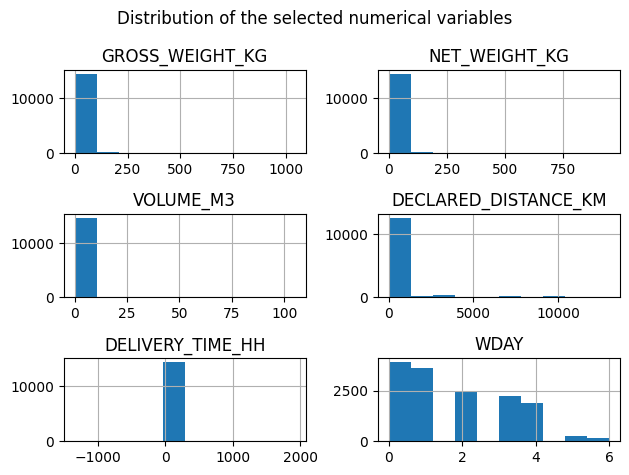

In [7]:
# List of specific numeric columns to analyze
colonne_numeriche_selezionate = [
    'GROSS_WEIGHT_KG',
    'NET_WEIGHT_KG',
    'VOLUME_M3',
    'DECLARED_DISTANCE_KM',
    'DELIVERY_TIME_HH',
    'WDAY'
]

# Create histograms for selected columns only
plt.figure(figsize=(20, 20))
data[colonne_numeriche_selezionate].hist()
plt.suptitle("Distribution of the selected numerical variables")
plt.tight_layout()  # Automatically adjust gaps between subplots
plt.show()

In [8]:
# Filter rows without null values
data_no_nulls = data.dropna()

# Save the new DataFrame to a CSV file
output_file_path = './delivery_clean.csv'
data_no_nulls.to_csv(output_file_path, index=False)

print(f"New CSV created with rows without null values: {output_file_path}")

New CSV created with rows without null values: ./delivery_clean.csv


Then we noticed that where the delivery time is negative, it is probably due to the inversion of the columns 'SHIPPING_DATE' and 'ACTUAL_DELIVERY_DATE', so we decided to invert these columns if the number in the column 'DELIVERY_TIME_HH'

In [10]:
# Upload the xls file
file_path = 'Definitivo.xls'  # Sostituisci con il percorso del tuo file CSV
df = pd.read_csv(file_path)

# Check negative values in the DELIVERY_TIME_HH column
mask = df['DELIVERY_TIME_HH'] < 0

# Reverse the values of the columns SHIPPING_DATE and ACTUAL_DELIVERY_DATE for rows with negative values
df.loc[mask, ['SHIPPING_DATE', 'ACTUAL_DELIVERY_DATE']] = df.loc[mask, ['ACTUAL_DELIVERY_DATE', 'SHIPPING_DATE']].values

# Save the modified DataFrame to a new CSV file
output_file_path = 'Definitivo1.csv'  # Replace with the desired path for the output file
df.to_csv(output_file_path, index=False)

print("Edit completed and file saved as:", output_file_path)

Modifica completata e file salvato come: Definitivo1.csv


Time calculation with new dates

In [12]:
# Check the first column values to identify any problems
print("Values of SHIPPING_DATE:")
print(df['SHIPPING_DATE'].head(10))
print("\nValues di ACTUAL_DELIVERY_DATE:")
print(df['ACTUAL_DELIVERY_DATE'].head(10))

# Convert columns to datetime format, handling errors
df['SHIPPING_DATE'] = pd.to_datetime(df['SHIPPING_DATE'], errors='coerce')
df['ACTUAL_DELIVERY_DATE'] = pd.to_datetime(df['ACTUAL_DELIVERY_DATE'], errors='coerce')

# Check for NaT (Not a Time) values after conversion
print("\nValues NaT in SHIPPING_DATE:")
print(df[df['SHIPPING_DATE'].isna()])
print("\nValues NaT in ACTUAL_DELIVERY_DATE:")
print(df[df['ACTUAL_DELIVERY_DATE'].isna()])

# Calculate delivery time in hours only if dates are valid
df['DELIVERY_TIME_HH'] = (df['ACTUAL_DELIVERY_DATE'] - df['SHIPPING_DATE']).dt.total_seconds() / 3600

#  Save the updated DataFrame in a new CSV file 
df.to_csv('Definitivo1.csv')

# Show the updated DataFrame
print(df[['UNNAMED: 0', 'DELIVERY_TIME_HH']])

Values of SHIPPING_DATE:
0   2022-11-16 00:00:14
1   2022-11-16 00:00:14
2   2022-11-17 00:00:14
3   2022-11-16 00:00:14
4   2022-11-16 00:00:14
5   2022-11-16 00:00:14
6   2022-11-17 00:00:14
7   2022-11-17 00:00:14
8   2022-11-17 00:00:14
9   2022-11-16 00:00:14
Name: SHIPPING_DATE, dtype: datetime64[ns]

Values di ACTUAL_DELIVERY_DATE:
0   2023-01-11 00:00:14
1   2023-01-11 00:00:14
2   2023-01-11 00:00:14
3   2023-01-11 00:00:14
4   2023-01-11 00:00:14
5   2023-01-11 00:00:14
6   2023-01-11 00:00:14
7   2023-01-11 00:00:14
8   2023-01-11 00:00:14
9   2023-01-11 00:00:14
Name: ACTUAL_DELIVERY_DATE, dtype: datetime64[ns]

Values NaT in SHIPPING_DATE:
       UNNAMED: 0        SERVICETYPE VEHICLETYPE DEPARTURE_COUNTRY  \
24             25  Corriere espresso     Express                IT   
74             75  Corriere espresso     Express                IT   
98             99  Corriere espresso     Express                IT   
99            100  Corriere espresso     Express           

# Prediction of missing values

In [ ]:
# Load the dataset
df = pd.read_csv("./delivery_data.csv")

# Select numerical features for prediction
features = ['GROSS_WEIGHT_KG', 'NET_WEIGHT_KG', 'VOLUME_M3', 'DECLARED_DISTANCE_KM', 'DELIVERY_TIME_HH']

# Define valid vehicle types
valid_vehicle_types = ['Standard', 'Express', 'Ground', 'Express 2nd Day', 'Express Next Day', 'Economy Express']









We created a function to update the vehicle type base on the service type

In [ ]:
def predict_missing_values(df, target_column):
    print(f"\nPredicting missing values for: {target_column}")
   
    df_known = df.dropna(subset=[target_column])
    df_unknown = df[df[target_column].isna()]
   
    if df_known.empty or df_unknown.empty:
        print(f"No values to predict for {target_column}")
        return df
   
    # Create and train the LabelEncoder with existing values
    le = LabelEncoder()
    encoded_y = le.fit_transform(df_known[target_column])
   
    X = df_known[features]
    y = encoded_y
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
   
    # Model evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {target_column}: {accuracy:.4f}")
   
    # Predict missing values and inverse transform
    predictions_encoded = model.predict(df_unknown[features])
    predictions_decoded = le.inverse_transform(predictions_encoded)
   
    # Update the dataframe with predicted values
    df_unknown[target_column] = predictions_decoded
    df = pd.concat([df_known, df_unknown])
   
    print(f"Predicted values: {len(df_unknown)}")
    print(f"Unique categories in {target_column}: {sorted(df[target_column].unique())}")
   
    return df

Than search the unique type of each feature and upload them in the csv

In [ ]:
# Execute predictions
print("Starting predictions...")
df = predict_missing_values(df, 'VEHICLETYPE')
df = predict_missing_values(df, 'SERVICETYPE')

# Sort the DataFrame to maintain original order
df = df.sort_index()

# Save the new CSV
output_filename = 'delivery_data_completed.csv'
df.to_csv(output_filename, index=False)
print(f"\nFile saved as: {output_filename}")

# Print some statistics on the new dataset
print("\nStatistics of the completed dataset:")
print(f"Total rows: {len(df)}")
print("\nCategories VEHICLETYPE:")
print(df['VEHICLETYPE'].value_counts())
print("\nCategories SERVICETYPE:")
print(df['SERVICETYPE'].value_counts())
print(f"\nMissing values VEHICLETYPE: {df['VEHICLETYPE'].isna().sum()}")
print(f"Missing values SERVICETYPE: {df['SERVICETYPE'].isna().sum()}")

Here we searched for the specific charateristics and then defined a function that let us predict the missing values

In [ ]:
# Select numerical characteristics for prediction
features = ['GROSS_WEIGHT_KG', 'NET_WEIGHT_KG', 'VOLUME_M3', 'DECLARED_DISTANCE_KM', 'DELIVERY_TIME_HH']

def predict_missing_values(df, target_column):
    print(f"\n{'='*50}")
    print(f"Predictive analytics for: {target_column}")
    print('='*50)
    
    df_known = df.dropna(subset=[target_column])
    df_unknown = df[df[target_column].isna()]
    
    if df_known.empty or df_unknown.empty:
        print(f"No value to predict for {target_column}")
        return df
    
    X = df_known[features]
    y = df_known[target_column].astype('category').cat.codes
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Model evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\nAccuracy metrics for {target_column}:")
    print(f"Overall accuracy: {accuracy:.4f}")
    
    print("\nDetailed classification report:")
    print(classification_report(y_test, y_pred))
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nImportance of features:")
    for idx, row in feature_importance.iterrows():
        print(f"{row['feature']}: {row['importance']:.4f}")
    
    # Predicting missing values
    df_unknown[target_column] = model.predict(df_unknown[features])
    df = pd.concat([df_known, df_unknown])
    
    print(f"\nNumber of predicted values: {len(df_unknown)}")
    
    return df

Than we execute the predictions and upload them on a new dataframe

In [ ]:
# Load the completed CSV file
df = pd.read_csv("./delivery_data_completed.csv")

# Normalize column names
df.columns = df.columns.str.strip().str.upper()

# Function to update VEHICLETYPE based on SERVICETYPE
def update_vehicletype(row):
    if pd.isna(row['VEHICLETYPE']) or row['VEHICLETYPE'] not in valid_vehicle_types:
        if 'corriere espresso' in str(row['SERVICETYPE']).lower():
            return 'Express'
        else:
            return 'Standard'
    return row['VEHICLETYPE']

# Apply the function to the 'VEHICLETYPE' column
df['VEHICLETYPE'] = df.apply(update_vehicletype, axis=1)

# Save the updated file
df.to_csv("./filtered_delivery_data.csv", index=False)

print("Updated file saved as 'filtered_delivery_data.csv'")

In [ ]:
# Find unique types and their counts
unique_vehicle_types = df['VEHICLETYPE'].nunique()
all_vehicle_types = df['VEHICLETYPE'].unique()

print(f"Number of different vehicle types: {unique_vehicle_types}")
print(f"Vehicle types present: {all_vehicle_types}")

# Data cleanup

Here we upload the file obtained from the Prediction code

In [ ]:
# Upload the original CSV
df_originale = pd.read_csv('./filtered_delivery_data.csv')

print(df_originale.columns)
df_originale.columns = df_originale.columns.str.strip()

Than we extracted the month from the shipping date and calculated the amount of shippings in each month, after that we calculated the amount of times each service type appears

In [ ]:
# Suppose the column is called 'SHIPPING_DATE'
# Extract only the month (6th and 7th characters)
df_originale['SHIPPING_DATE'] = df_originale['SHIPPING_DATE'].str[5:7]

# Print the result to check
print(df_originale['SHIPPING_DATE'])

# Count how many times it appears each month
conteggio_mesi = df_originale['SHIPPING_DATE'].value_counts()

# Prints the month count
print(conteggio_mesi)

# Count how many times each type of SERVICETYPE appears
conteggio_service_type = df_originale['SERVICETYPE'].value_counts()

Here we create the graph to show the spread of each service type

In [ ]:
# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(conteggio_service_type, labels=conteggio_service_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of SERVICETYPE types')
plt.axis('equal')  # To maintain the circular shape
plt.show()

We count the amount of times a zipcode appears and then we calculate the percentage of each zipcode.
After this we filter the zipcode with a 2 or less percent of appearence and group them under the "others" definition

In [ ]:
# Count how many times each zip code appears in the 'DEPARTURE_ZIPCODE' column
conteggio_departure_zipcode = df_originale['DEPARTURE_ZIPCODE'].value_counts()

# Calculate the percentage for each zip code
percentuale_zipcode = conteggio_departure_zipcode / conteggio_departure_zipcode.sum() * 100

# Filter zip codes with percentage greater than 2%
zipcodes_frequenti = percentuale_zipcode[percentuale_zipcode > 2]

# Groups all other postcodes into the "Other" category
other = percentuale_zipcode[percentuale_zipcode <= 2].sum()
zipcodes_frequenti['Others'] = other

We created a pie graph to rappresent the diffusion of each zipcode in order to understand where was the primary start point 

In [ ]:
# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(zipcodes_frequenti, labels=zipcodes_frequenti.index, autopct='%1.1f%%', startangle=140)
plt.title('Departure ZIP Code Distribution (DEPARTURE_ZIPCODE) - Greater than 2%')
plt.axis('equal')  # To maintain the circular shape
plt.show()

df = pd.read_csv('./filtered_delivery_data.csv')

# Find unique types and their count
unique_vehicle_types = df_originale['VEHICLETYPE'].nunique()
all_vehicle_types = df_originale['VEHICLETYPE'].unique()

print(f"Number of different types of vehicles: {unique_vehicle_types}")
print(f"Types of vehicles present: {all_vehicle_types}")

## Conclusions

We found out that there is a huge amount of deliveries that comes and goes from Italy compared to the amount from the US and there are none from Italy to the US.
We also noticed that more deliveries starts from the first days of the week, we recommend to try to analyze this phenomenom in order to understand and project a optimized way to spread those deliveries in the rest of the week.
Another thing we saw it's that most of the deliveries comes from a specific zipcode.